# Tutorial 6

### Load Packages

In [1]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from scipy.stats                            import t
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from statsmodels.tsa.arima.model            import ARIMA

### Set Graph Parameters

In [2]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

# Q2

### Load Data

In [4]:
df = pd.read_csv("AuQuGDP.csv")

In [8]:
df.head()

,Unnamed: 0,Y,quarter,year,t
date,,,,,
1960-01-01,0,6.468300e+10,1,1960,1/01/1960
1960-01-04,1,6.647300e+10,2,1960,1/04/1960
1960-01-07,2,6.662300e+10,3,1960,1/07/1960
1960-01-10,3,6.649000e+10,4,1960,1/10/1960
1961-01-01,4,6.669000e+10,1,1961,1/01/1961


### Set Time Index

In [6]:
df['date'] = pd.to_datetime(df['Time'])
df = df.set_index('date')
df.drop(['Time'], axis = 1, inplace = True)
df.head()

,Unnamed: 0,AuGDP,quarter,year,t
date,,,,,
1960-01-01,0,6.468300e+10,1,1960,1/01/1960
1960-01-04,1,6.647300e+10,2,1960,1/04/1960
1960-01-07,2,6.662300e+10,3,1960,1/07/1960
1960-01-10,3,6.649000e+10,4,1960,1/10/1960
1961-01-01,4,6.669000e+10,1,1961,1/01/1961


In [7]:
df = df.rename(columns={"AuGDP" : "Y"})

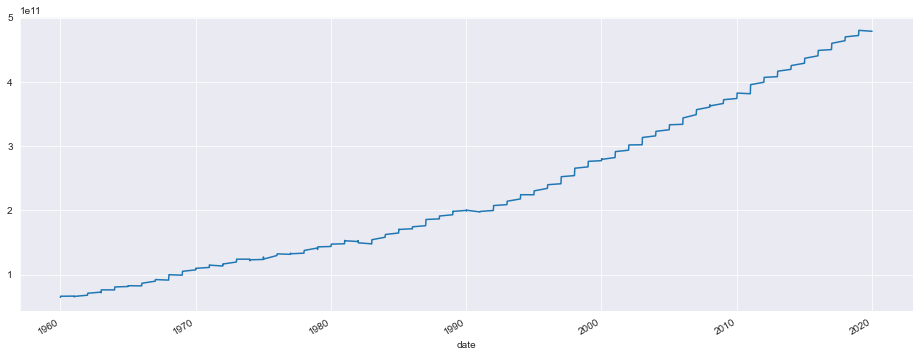

In [9]:
df['Y'].plot()
plt.show()

### (a). ADF

##### ADF test of "Y"

In [17]:
df2 = df

X = df['Y'].values

### ADF lag
result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

### ADF BIC
result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result[0], result[1], result[2]))

 ADF statistic: -0.346, 
 p-value: 0.988, 
 critical value: {'1%': -3.9969944961660877, '5%': -3.4289434905960645, '10%': -3.1378930946180557}
 ADF statistic: -0.346, 
 p-value: 0.988, 
 critical value: {'1%': -3.9969944961660877, '5%': -3.4289434905960645, '10%': -3.1378930946180557}


### (b). Order of Intergration I(d)

###### 1st Order Difference Test

In [21]:
df2['Y_D1'] = df2['Y'].diff()

df2 = df2.dropna(axis = 0)

X = df2['Y_D1'].values 

result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

### ADF BIC
result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result[0], result[1], result[2]))

 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}
 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


###### 2nd Order Difference Test

In [27]:
df2['Y_D2'] = df2['Y_D1'].diff()

df2 = df2.dropna(axis = 0)

X = df2['Y_D2'].values 

result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

### ADF BIC
result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result[0], result[1], result[2]))

 ADF statistic: -13.009, 
 p-value: 0.000, 
 critical value: {'1%': -3.9979881078231756, '5%': -3.4294209574472734, '10%': -3.138173000968399}
 ADF statistic: -12.068, 
 p-value: 0.000, 
 critical value: {'1%': -3.998158754122054, '5%': -3.429502948077832, '10%': -3.1382210632264758}


###### 3rd Order Difference Test

In [28]:
df2['Y_D3'] = df2['Y_D2'].diff()

df2 = df2.dropna(axis = 0)

X = df2['Y_D3'].values 

result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

### ADF BIC
result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result[0], result[1], result[2]))

 ADF statistic: -15.576, 
 p-value: 0.000, 
 critical value: {'1%': -3.998158754122054, '5%': -3.429502948077832, '10%': -3.1382210632264758}
 ADF statistic: -10.601, 
 p-value: 0.000, 
 critical value: {'1%': -3.999214656236089, '5%': -3.4300102058154156, '10%': -3.1385183923675672}


###### 4th Order Difference Test

In [29]:
df2['Y_D2'] = df2['Y_D1'].diff()

df2 = df2.dropna(axis = 0)

X = df2['Y_D2'].values 

result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

### ADF BIC
result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result[0], result[1], result[2]))

 ADF statistic: -12.982, 
 p-value: 0.000, 
 critical value: {'1%': -3.9983308920613543, '5%': -3.4295856520805996, '10%': -3.1382695426857397}
 ADF statistic: -12.061, 
 p-value: 0.000, 
 critical value: {'1%': -3.998504541286253, '5%': -3.429669078807414, '10%': -3.1383184448027004}


###### 5th Order Difference Test

In [30]:
df2['Y_D2'] = df2['Y_D1'].diff()

df2 = df2.dropna(axis = 0)

X = df2['Y_D2'].values 

result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

### ADF BIC
result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result[0], result[1], result[2]))

 ADF statistic: -12.961, 
 p-value: 0.000, 
 critical value: {'1%': -3.998504541286253, '5%': -3.429669078807414, '10%': -3.1383184448027004}
 ADF statistic: -12.003, 
 p-value: 0.000, 
 critical value: {'1%': -3.998679721788444, '5%': -3.429753237774307, '10%': -3.1383677751294488}


### (c). Choose the optimal p and q that minimises the AIC and BIC (Grid Search)

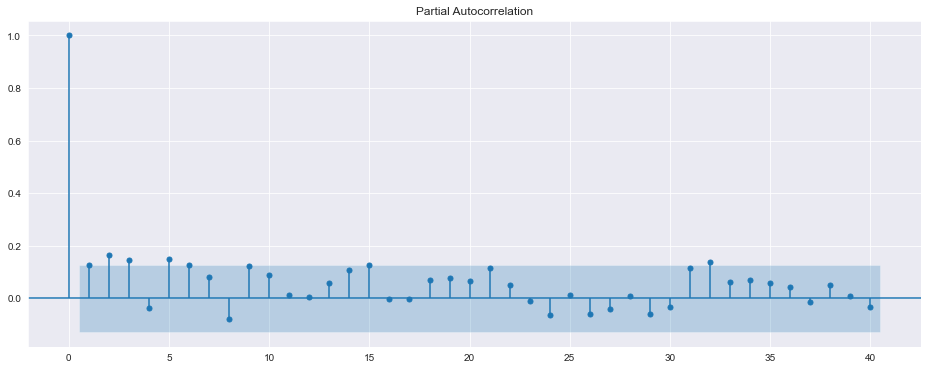

In [31]:
### PACF
sm.graphics.tsa.plot_pacf(df2['Y_D1'].values.squeeze(), lags=40)
plt.show()

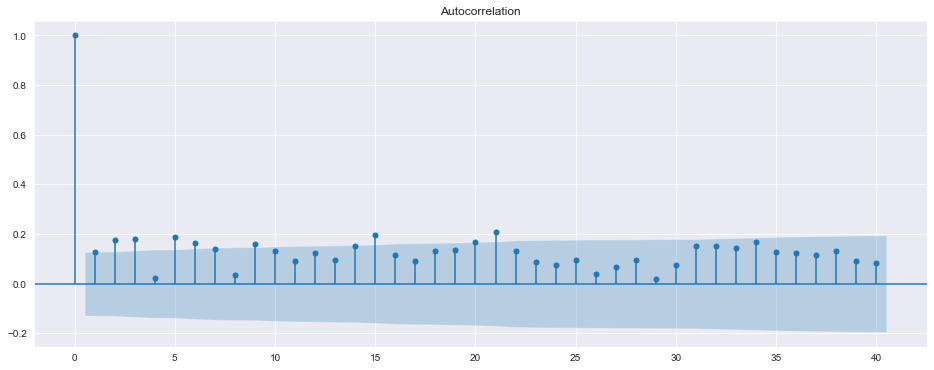

In [32]:
### ACF
sm.graphics.tsa.plot_acf(df2['Y_D1'].values.squeeze(), lags=40)
plt.show()

In [40]:
### lets start from p=q=7 and work our way down the models

ARIMA_010 = ARIMA(df2['Y'][df2.index.year<=2018], order=(0,1,0))
ARIMA_110 = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,0))
ARIMA_011 = ARIMA(df2['Y'][df2.index.year<=2018], order=(0,1,1))
ARIMA_111 = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,1))
ARIMA_211 = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,1))
ARIMA_112 = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,2))
ARIMA_212 = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,2))
ARIMA_312 = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,2))
ARIMA_213 = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,3))
ARIMA_313 = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,3))
ARIMA_413 = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,3))
ARIMA_314 = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,4))
ARIMA_414 = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,4))
ARIMA_514 = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,4))
ARIMA_415 = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,5))
ARIMA_515 = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,5))
ARIMA_615 = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,5))
ARIMA_516 = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,6))
ARIMA_616 = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,6))
ARIMA_716 = ARIMA(df2['Y'][df2.index.year<=2018], order=(7,1,6))
ARIMA_617 = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,7))
ARIMA_717 = ARIMA(df2['Y'][df2.index.year<=2018], order=(7,1,7))

res_ARIMA_010 = ARIMA_010.fit()
res_ARIMA_110 = ARIMA_110.fit()
res_ARIMA_001 = ARIMA_011.fit()
res_ARIMA_111 = ARIMA_111.fit()
res_ARIMA_211 = ARIMA_211.fit()
res_ARIMA_112 = ARIMA_112.fit()
res_ARIMA_212 = ARIMA_212.fit()
res_ARIMA_312 = ARIMA_312.fit()
res_ARIMA_213 = ARIMA_213.fit()
res_ARIMA_313 = ARIMA_313.fit()
res_ARIMA_413 = ARIMA_413.fit()
res_ARIMA_314 = ARIMA_314.fit()
res_ARIMA_414 = ARIMA_414.fit()
res_ARIMA_514 = ARIMA_514.fit()
res_ARIMA_415 = ARIMA_415.fit()
res_ARIMA_515 = ARIMA_515.fit()
res_ARIMA_615 = ARIMA_615.fit()
res_ARIMA_516 = ARIMA_516.fit()
res_ARIMA_616 = ARIMA_616.fit()
res_ARIMA_716 = ARIMA_716.fit()
res_ARIMA_617 = ARIMA_617.fit()
res_ARIMA_717 = ARIMA_717.fit()


ARIMA_010_AIC = res_ARIMA_010.aic
ARIMA_110_AIC = res_ARIMA_110.aic
ARIMA_011_AIC = res_ARIMA_001.aic
ARIMA_111_AIC = res_ARIMA_111.aic
ARIMA_211_AIC = res_ARIMA_211.aic
ARIMA_112_AIC = res_ARIMA_112.aic
ARIMA_212_AIC = res_ARIMA_212.aic
ARIMA_312_AIC = res_ARIMA_312.aic
ARIMA_213_AIC = res_ARIMA_213.aic
ARIMA_313_AIC = res_ARIMA_313.aic
ARIMA_413_AIC = res_ARIMA_413.aic
ARIMA_314_AIC = res_ARIMA_314.aic
ARIMA_414_AIC = res_ARIMA_414.aic
ARIMA_514_AIC = res_ARIMA_514.aic
ARIMA_415_AIC = res_ARIMA_415.aic
ARIMA_515_AIC = res_ARIMA_515.aic
ARIMA_615_AIC = res_ARIMA_615.aic
ARIMA_516_AIC = res_ARIMA_516.aic
ARIMA_616_AIC = res_ARIMA_616.aic
ARIMA_716_AIC = res_ARIMA_716.aic
ARIMA_617_AIC = res_ARIMA_617.aic
ARIMA_717_AIC = res_ARIMA_717.aic

ARIMA_010_BIC = res_ARIMA_010.bic
ARIMA_110_BIC = res_ARIMA_110.bic
ARIMA_011_BIC = res_ARIMA_001.bic
ARIMA_111_BIC = res_ARIMA_111.bic
ARIMA_211_BIC = res_ARIMA_211.bic
ARIMA_112_BIC = res_ARIMA_112.bic
ARIMA_212_BIC = res_ARIMA_212.bic
ARIMA_312_BIC = res_ARIMA_312.bic
ARIMA_213_BIC = res_ARIMA_213.bic
ARIMA_313_BIC = res_ARIMA_313.bic
ARIMA_413_BIC = res_ARIMA_413.bic
ARIMA_314_BIC = res_ARIMA_314.bic
ARIMA_414_BIC = res_ARIMA_414.bic
ARIMA_514_BIC = res_ARIMA_514.bic
ARIMA_415_BIC = res_ARIMA_415.bic
ARIMA_515_BIC = res_ARIMA_515.bic
ARIMA_615_BIC = res_ARIMA_615.bic
ARIMA_516_BIC = res_ARIMA_516.bic
ARIMA_616_BIC = res_ARIMA_616.bic
ARIMA_716_BIC = res_ARIMA_716.bic
ARIMA_617_BIC = res_ARIMA_617.bic
ARIMA_717_BIC = res_ARIMA_717.bic



test_data = [
        ['ARIMA(0,1,0)',ARIMA_010_AIC,ARIMA_010_BIC],['ARIMA(1,1,0)',ARIMA_110_AIC,ARIMA_110_BIC],['ARIMA(0,1,1)',ARIMA_011_AIC,ARIMA_011_BIC],
        ['ARIMA(1,1,1)',ARIMA_111_AIC,ARIMA_111_BIC],['ARIMA(2,1,1)',ARIMA_211_AIC,ARIMA_211_BIC],['ARIMA(1,1,2)',ARIMA_112_AIC,ARIMA_112_BIC],
        ['ARIMA(2,1,2)',ARIMA_212_AIC,ARIMA_212_BIC],['ARIMA(3,1,2)',ARIMA_312_AIC,ARIMA_312_BIC],['ARIMA(2,1,3)',ARIMA_312_AIC,ARIMA_312_BIC],
        ['ARIMA(3,1,3)',ARIMA_313_AIC,ARIMA_313_BIC],['ARIMA(4,1,3)',ARIMA_413_AIC,ARIMA_413_BIC],['ARIMA(3,1,4)',ARIMA_314_AIC,ARIMA_314_BIC],
        ['ARIMA(4,1,4)',ARIMA_414_AIC,ARIMA_414_BIC],['ARIMA(5,1,4)',ARIMA_514_AIC,ARIMA_514_BIC],['ARIMA(4,1,5)',ARIMA_415_AIC,ARIMA_415_BIC],
        ['ARIMA(5,1,5)',ARIMA_515_AIC,ARIMA_515_BIC],['ARIMA(6,1,5)',ARIMA_615_AIC,ARIMA_615_BIC],['ARIMA(5,1,6)',ARIMA_516_AIC,ARIMA_516_BIC],
        ['ARIMA(6,1,6)',ARIMA_616_AIC,ARIMA_616_BIC],['ARIMA(7,1,6)',ARIMA_716_AIC,ARIMA_716_BIC],['ARIMA(6,1,7)',ARIMA_617_AIC,ARIMA_617_BIC],
        ['ARIMA(7,1,7)',ARIMA_717_AIC,ARIMA_717_BIC]
       ]
df_AIC_BIC = pd.DataFrame(test_data,columns=['Model','AIC',"BIC"])

print(df_AIC_BIC)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

           Model           AIC           BIC
0   ARIMA(0,1,0)  10556.957526  10560.391248
1   ARIMA(1,1,0)  10548.598463  10555.465907
2   ARIMA(0,1,1)  10542.185680  10549.053124
3   ARIMA(1,1,1)  10398.851517  10409.152683
4   ARIMA(2,1,1)  10400.787130  10414.522018
5   ARIMA(1,1,2)  10400.895456  10414.630344
6   ARIMA(2,1,2)  10402.171264  10419.339874
7   ARIMA(3,1,2)  10404.369268  10424.971600
8   ARIMA(2,1,3)  10404.369268  10424.971600
9   ARIMA(3,1,3)  10403.842107  10427.878161
10  ARIMA(4,1,3)  10401.992672  10429.462448
11  ARIMA(3,1,4)  10399.895083  10427.364859
12  ARIMA(4,1,4)  10403.903677  10434.807175
13  ARIMA(5,1,4)  10406.795649  10441.132869
14  ARIMA(4,1,5)  10406.656154  10440.993374
15  ARIMA(5,1,5)  10409.940230  10447.711172
16  ARIMA(6,1,5)  10412.643341  10453.848005
17  ARIMA(5,1,6)  10412.976115  10454.180779
18  ARIMA(6,1,6)  10413.608802  10458.247188
19  ARIMA(7,1,6)  10416.308105  10464.380213
20  ARIMA(6,1,7)  10415.589929  10463.662037
21  ARIMA(

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


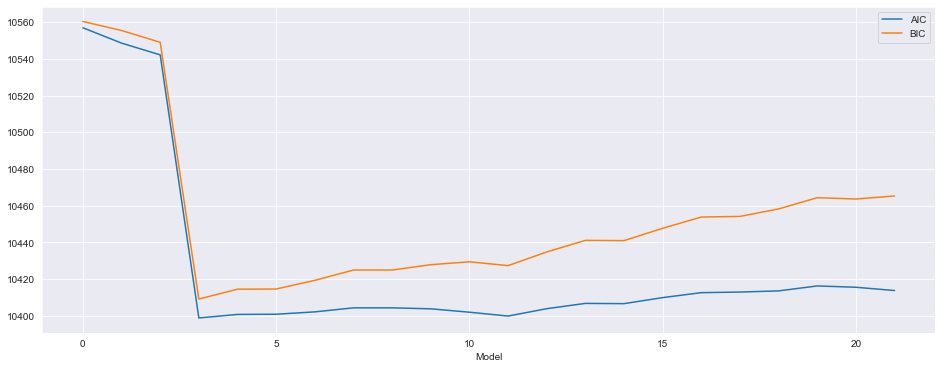

In [36]:
df_AIC_BIC['AIC'].plot()
df_AIC_BIC['BIC'].plot()
plt.xlabel('Model')
plt.legend()
plt.show()

In [37]:
print(res_ARIMA_111.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  230
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5196.426
Date:                Sat, 10 Sep 2022   AIC                          10398.852
Time:                        17:25:33   BIC                          10409.153
Sample:                             0   HQIC                         10403.007
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    580.192      0.000       0.997       1.003
ma.L1         -0.9992      0.059    -16.849      0.000      -1.115      -0.883
sigma2      3.163e+18        nan        nan        n

### (d). Ljung-Box Test for ARIMA(1,1,1)

In [42]:
sm.stats.acorr_ljungbox(res_ARIMA_111.resid, return_df=True)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.004752,0.945041
2,0.085337,0.958229
3,0.117426,0.989667
4,0.226894,0.994031
5,0.254041,0.998419
6,0.296234,0.999515
7,0.445024,0.999624
8,0.500891,0.999866
9,0.546452,0.999955
10,0.589060,0.999986


### (e). 1 and 5 period ahead forecasts

In [45]:
res_ARIMA_111.predict()

date
1961-01-07    0.000000e+00
1961-01-10    6.723088e+10
1962-01-01    6.795094e+10
1962-01-04    6.981346e+10
1962-01-07    7.110712e+10
                  ...     
2017-01-10    4.594476e+11
2018-01-01    4.618501e+11
2018-01-04    4.659771e+11
2018-01-07    4.696394e+11
2018-01-10    4.711222e+11
Name: predicted_mean, Length: 230, dtype: float64

In [53]:
res_ARIMA_111.forecast(steps = 5)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


230    4.719045e+11
231    4.736690e+11
232    4.754334e+11
233    4.771979e+11
234    4.789623e+11
Name: predicted_mean, dtype: float64

In [48]:
df2['Y']

date
1961-01-07    6.548600e+10
1961-01-10    6.623200e+10
1962-01-01    6.809100e+10
1962-01-04    6.939500e+10
1962-01-07    6.995700e+10
                  ...     
2019-01-01    4.722670e+11
2019-01-04    4.751560e+11
2019-01-07    4.777910e+11
2019-01-10    4.802800e+11
2020-01-01    4.788110e+11
Name: Y, Length: 235, dtype: float64

In [49]:
resid = res_ARIMA_111.predict() - df2['Y']
print(resid)

date
1961-01-07   -6.548600e+10
1961-01-10    9.988840e+08
1962-01-01   -1.400609e+08
1962-01-04    4.184624e+08
1962-01-07    1.150118e+09
                  ...     
2019-01-01             NaN
2019-01-04             NaN
2019-01-07             NaN
2019-01-10             NaN
2020-01-01             NaN
Length: 235, dtype: float64


### (f). ARMA(1,1) forecast comparison

In [54]:
ARMA_011 = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,0,1))
res_ARMA_111 = ARMA_011.fit()

print(res_ARMA_111.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  230
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5279.982
Date:                Sat, 10 Sep 2022   AIC                          10567.964
Time:                        17:36:43   BIC                          10581.716
Sample:                             0   HQIC                         10573.511
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.252e+11   6.59e-17   3.42e+27      0.000    2.25e+11    2.25e+11
ar.L1          0.9999      0.001   1728.024      0.000       0.999       1.001
ma.L1          0.3818      0.069      5.506      0.0

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

In [55]:
res_ARMA_111.predict()

date
1961-01-07    2.252344e+11
1961-01-10    6.549750e+10
1962-01-01    6.649583e+10
1962-01-04    6.870779e+10
1962-01-07    6.967537e+10
                  ...     
2017-01-10    4.589119e+11
2018-01-01    4.605213e+11
2018-01-04    4.655966e+11
2018-01-07    4.687089e+11
2018-01-10    4.695710e+11
Name: predicted_mean, Length: 230, dtype: float64

In [56]:
res_ARMA_111.forecast(steps = 5)

C:\Users\Micha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


230    4.703279e+11
231    4.702985e+11
232    4.702691e+11
233    4.702397e+11
234    4.702103e+11
Name: predicted_mean, dtype: float64

# Q3

### Load Data

In [147]:
data = pd.read_csv('ausunemp.csv')

In [148]:
data['Date'] = data['month']
data = data.set_index('Date')

In [179]:
data.head()

,month,unemp,m1,m2,m3,m4,m5,m6,m7,m8,...,CMA,unemp/CMA,snbar,sn,d,t,t2,t3,t4,tr
Date,,,,,,,,,,,,,,,,,,,,,
1990m1,1990m1,6.7,1,0,0,0,0,0,0,0,...,NaN,NaN,1.083478,1.083548,6.183393,0,0,0,0,9.674277
1990m2,1990m2,7.1,0,1,0,0,0,0,0,0,...,NaN,NaN,1.115468,1.115540,6.364631,1,1,1,1,9.664879
1990m3,1990m3,6.5,0,0,1,0,0,0,0,0,...,NaN,NaN,1.054478,1.054545,6.163795,2,4,8,16,9.655205
1990m4,1990m4,6.3,0,0,0,1,0,0,0,0,...,NaN,NaN,1.008868,1.008933,6.244222,3,9,27,81,9.645258
1990m5,1990m5,6.5,0,0,0,0,1,0,0,0,...,NaN,NaN,0.995486,0.995550,6.529056,4,16,64,256,9.635039


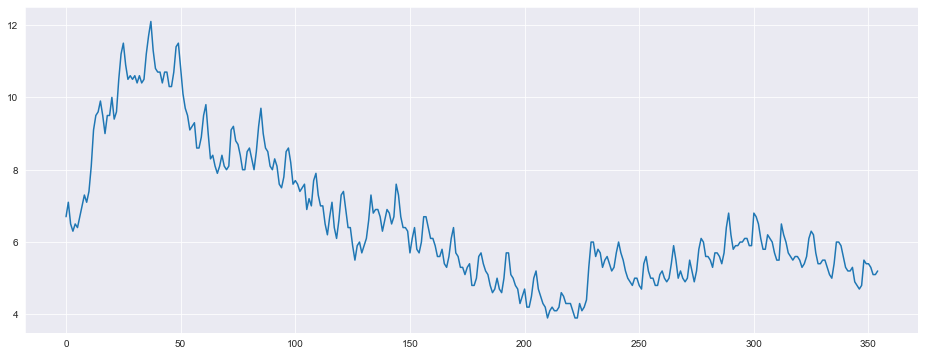

In [64]:
data['unemp'].plot()
plt.show()

### (a).

###### Calculate moving average

In [150]:
data['MA'] = data['unemp'].rolling(window=12, center = True).mean()

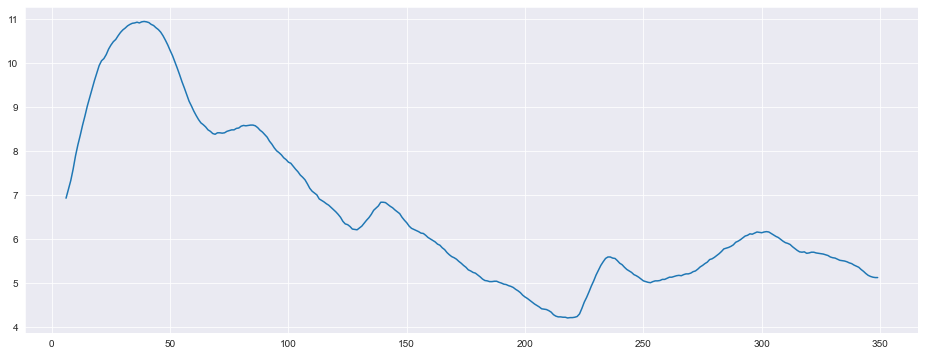

In [69]:
data['MA'].plot()
plt.show()

###### Compute CMA

In [151]:
data['CMA'] = data['MA'].rolling(window=2, center = True).mean().shift(-1)

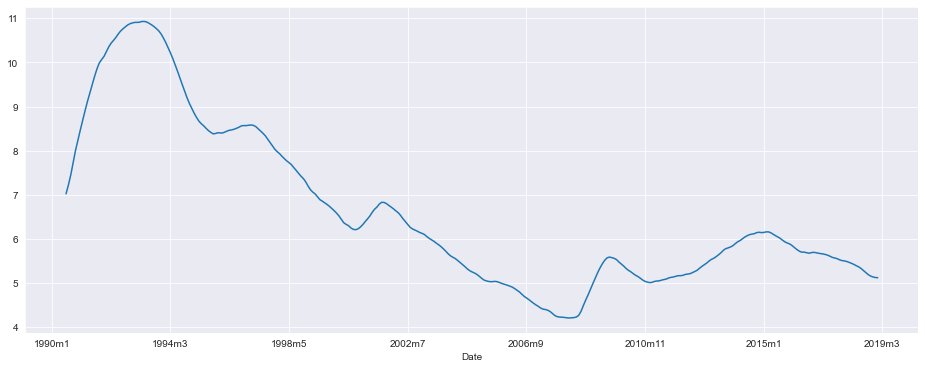

In [83]:
data['CMA'].plot()
plt.show()

###### Compute and Plot Y/CMA

In [152]:
data['unemp/CMA'] = data['unemp']/data['CMA']

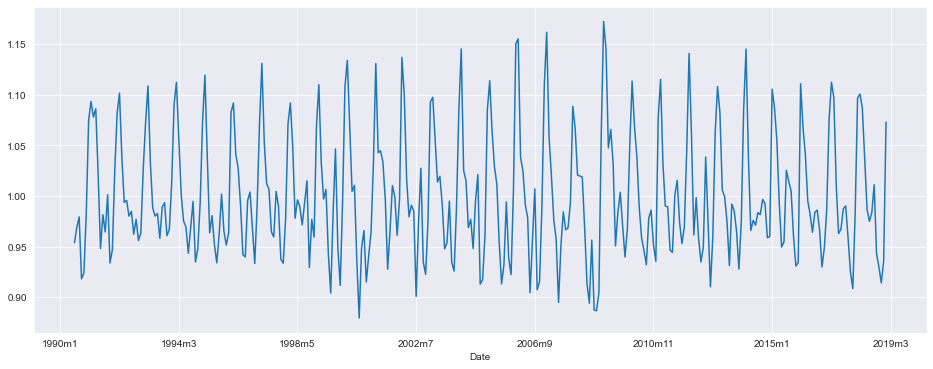

In [87]:
data['unemp/CMA'].plot()
plt.show()

###### Add 60 more periods for prediction

###### Note you can only add it here, not before nor afterwards otherwise there will be errors

In [193]:
L = 59  # how many zeros
i=0
while i<=L:
    i += 1
    last_date = df.index[-1] + pd.DateOffset(months=1)
    data.loc[last_date] = np.nan

data.tail(60)

,month,unemp,m1,m2,m3,m4,m5,m6,m7,m8,...,unemp/CMA,snbar,sn,d,t,t2,t3,t4,tr,trsn
Date,,,,,,,,,,,,,,,,,,,,,
2014m9,2014m9,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996596,0.995027,0.995091,6.130093,296.0,87616.0,25934336.0,-9.133711e+08,5.200988,5.175456
2014m10,2014m10,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992542,0.946789,0.946850,6.442413,297.0,88209.0,26198073.0,-8.091069e+08,5.196087,4.919916
2014m11,2014m11,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.958700,0.936576,0.936636,6.299138,298.0,88804.0,26463592.0,-7.037842e+08,5.191433,4.862484
2014m12,2014m12,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960000,0.976200,0.976263,6.043453,299.0,89401.0,26730899.0,-5.973958e+08,5.187029,5.063905
2015m1,2015m1,6.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.105691,1.083478,1.083548,6.275682,300.0,90000.0,27000000.0,-4.899346e+08,5.182875,5.615892
2015m2,2015m2,6.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087221,1.115468,1.115540,6.006060,301.0,90601.0,27270901.0,-3.813934e+08,5.178973,5.777351
2015m3,2015m3,6.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.054767,1.054478,1.054545,6.163795,302.0,91204.0,27543608.0,-2.717650e+08,5.175323,5.457612
2015m4,2015m4,6.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.993216,1.008868,1.008933,6.045992,303.0,91809.0,27818127.0,-1.610421e+08,5.171927,5.218127
2015m5,2015m5,5.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.949523,0.995486,0.995550,5.825927,304.0,92416.0,28094464.0,-4.921754e+07,5.168786,5.145784


In [146]:
names = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

for i, x in enumerate(names):
    data[x] = (data.index.get_level_values(0).Date == i+1).astype(int)

data.head()

AttributeError: 'Index' object has no attribute 'Date'

###### Regress the variable on monthly dummies

In [154]:
model = sm.OLS(data['unemp/CMA'], data[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']],missing = 'drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              unemp/CMA   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          3.77e-115
Time:                        20:36:51   Log-Likelihood:                 769.83
No. Observations:                 343   AIC:                            -1516.
Df Residuals:                     331   BIC:                            -1470.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m1             1.0835      0.005    223.489      0.0

###### Compute SN\bar based on prior regression

In [158]:
data['snbar'] = results.predict(data[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']])

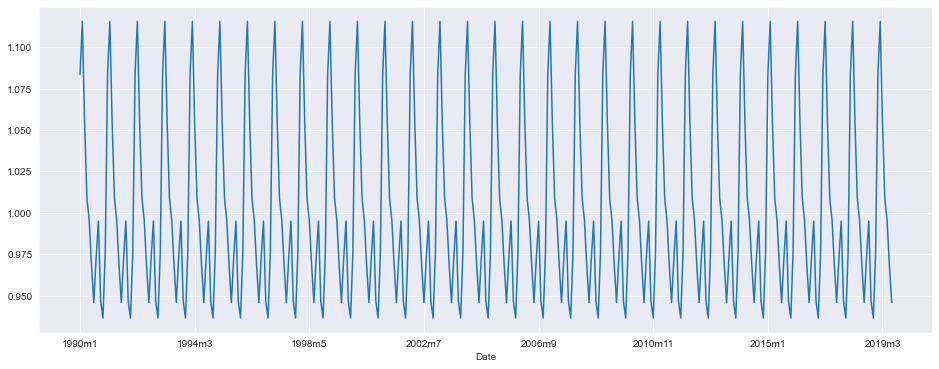

In [159]:
data['snbar'].plot()
plt.show()

###### careful: the regression trick that we used during the lecture to find the mean of the snbar doesn't work here, because there are more January's-July's than Augusts-Decembers in this data set. we can fix that by only regressing over the first year (or any year, really... or any period that includes equally many observations for each month)

In [164]:
df1 = data.head(12)

,month,unemp,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,MA,CMA,unemp/CMA,snbar
Date,,,,,,,,,,,,,,,,,,
1990m1,1990m1,6.7,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.083478
1990m2,1990m2,7.1,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.115468
1990m3,1990m3,6.5,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.054478
1990m4,1990m4,6.3,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.008868
1990m5,1990m5,6.5,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,0.995486


###### regressing all snbar with constant only is equivalent to compute the mean of snbar, both of which give you the same result. Hence, I replace the regression with a simple mean computataion to save computation load.

In [165]:
df1['snbar'].mean()

0.9999358564198791

In [167]:
data['sn'] = data['snbar']/df1['snbar'].mean()

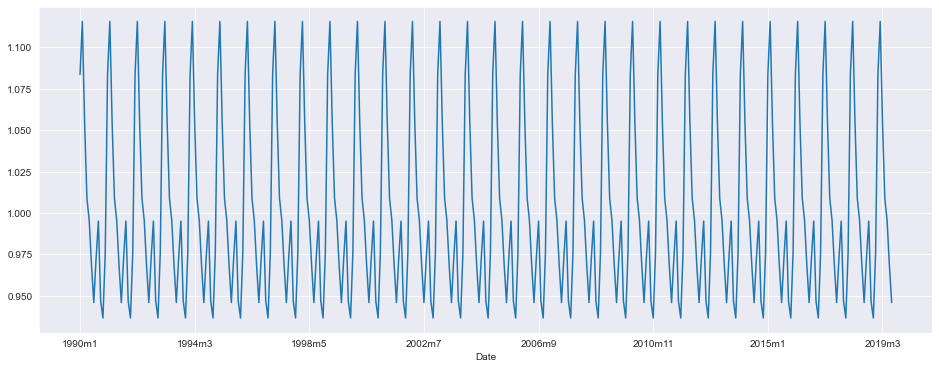

In [169]:
data['sn'].plot()
plt.show()

###### Computer and plot the d_t, deseasonalised signal

In [184]:
data['d'] = data['unemp']/data['sn']

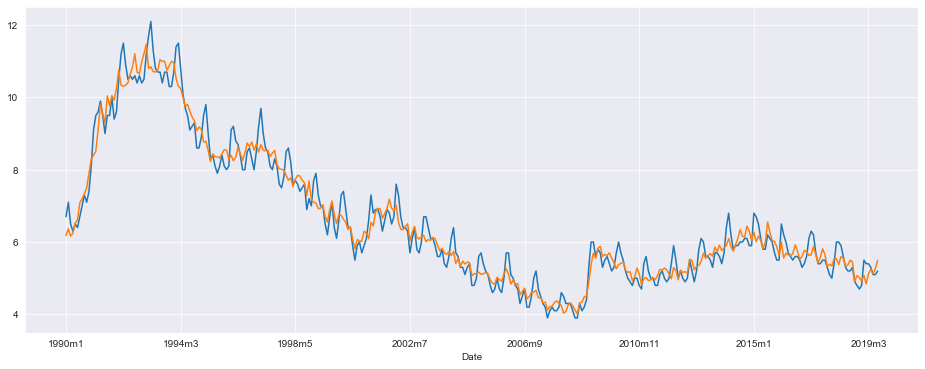

In [175]:
data['unemp'].plot()
data['d'].plot()
plt.show()

###### lets detrend by regressing the deseasonalised signal to the polynomial of t

In [176]:
data['t'] = np.arange(len(data))
data['t2'] = np.power(data['t'],2)
data['t3'] = np.power(data['t'],3)
data['t4'] = np.power(data['t'],4)

data[['t','t2','t3','t4']].head(5)

,t,t2,t3,t4
Date,,,,
1990m1,0,0,0,0
1990m2,1,1,1,1
1990m3,2,4,8,16
1990m4,3,9,27,81
1990m5,4,16,64,256


In [185]:
X = data[['t','t2','t3','t4']]
X = sm.add_constant(X)

model1= sm.OLS(data['d'], X, missing='drop')
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     280.3
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          9.93e-108
Time:                        20:52:23   Log-Likelihood:                -464.87
No. Observations:                 355   AIC:                             939.7
Df Residuals:                     350   BIC:                             959.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6743      0.190     50.790      0.0

##### Compute the trend signal TR

In [186]:
### The OLS estimators have got stuck at a local minimum and not the global minimum. Thus the estimatrs for tr are wrong
data['tr'] = results1.predict(X)

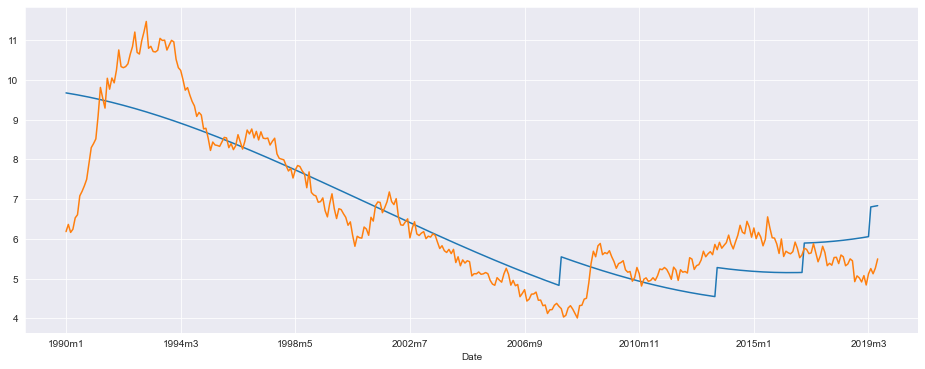

In [181]:
data['tr'].plot()
data['d'].plot()
plt.show()

In [187]:
data['trsn'] = data['tr'] * data['sn']

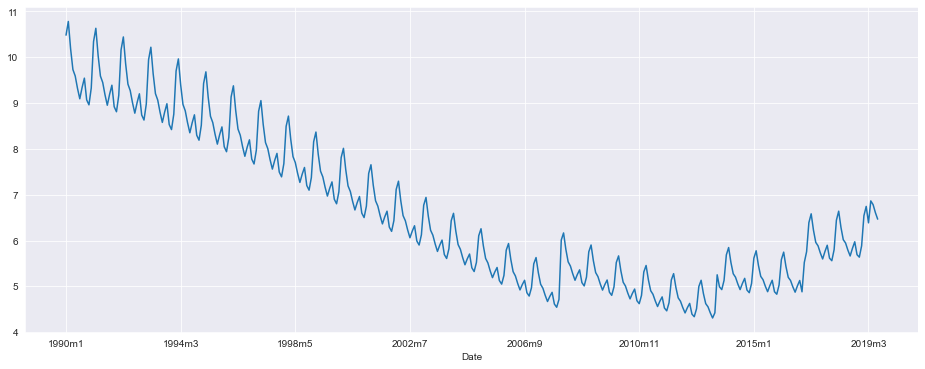

In [188]:
data['trsn'].plot()
plt.show()

###### Construcitng prediction intervals where prtsed is the prediction standard error in sample with lower and upper bounds

In [189]:
prstd, iv_l, iv_u= wls_prediction_std(results1)

###### However, unlike stata, statsmodel package cannot compute the prediction standard error for out-of-sample data (2019-08-01 to 2024-07-01). Hence, I have to manually compute it myself. The following computation is based on the formula in the book "Element of Statistcal Learning".

In [190]:
x_new  = X[-60:]
x_mat  = X[:355]

sigma2_est = sum(results1.resid**2) / (len(x_mat) - 5)

# Calculate the prediction SE:
y_pred_se = np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
y_pred_se = np.dot(np.dot(x_new, y_pred_se), np.transpose(x_new))
y_pred_se = np.identity(len(x_new)) + y_pred_se
y_pred_se = sigma2_est * y_pred_se
y_pred_se = np.sqrt(np.diag(y_pred_se))

###### the prediction standard error for out-of-sample data (2019-08-01 to 2024-07-01).

In [191]:
y_pred_se

array([0.90796743, 0.90767825, 0.90742079, 0.9071962 , 0.90700564,
       0.90685033, 0.90673147, 0.90665031, 0.9066081 , 0.90660614,
       0.90664572, 0.90672819, 0.90685488, 0.90702717, 0.90724645,
       0.90751413, 0.90783166, 0.90820047, 0.90862205, 0.90909788,
       0.90962948, 0.91021838, 0.91086611, 0.91157426, 0.91234438,
       0.91317809, 0.91407699, 0.91455238, 0.91394895, 0.91340208,
       0.9129137 , 0.9124858 , 0.91212036, 0.91181941, 0.911585  ,
       0.91141922, 0.91132417, 0.91130197, 0.91135478, 0.91148476,
       0.9116941 , 0.91198502, 0.91235974, 0.91282051, 0.91336958,
       0.91400921, 0.91474169, 0.91556931, 0.91649437, 0.91751915,
       0.91864597, 0.91987714, 0.92121495, 0.92266171, 0.92421971,
       0.92589125, 0.92545263, 0.92529118, 0.92523775, 0.92529532])

###### combining the in-sample and out-of-sample prediction standard error, let's costruct the prediction interval for TR and the prediction interval for TR. SN using confidence level 0.95, for both in-sample and out-of-sample data

In [192]:
prstd, iv_l, iv_u= wls_prediction_std(results1)
data['se'] = np.concatenate((prstd,y_pred_se))
data['tr_lo_95'] = data['tr'] - t.ppf(0.975, 350) * data['se']
data['tr_hi_95'] = data['tr'] + t.ppf(0.975, 350) * data['se']
data['trsn_lo_95'] = data['trsn'] - t.ppf(0.975, 350) * data['se']
data['trsn_hi_95'] = data['trsn'] + t.ppf(0.975, 350) * data['se']

ValueError: Length of values (415) does not match length of index (355)

In [ ]:
df[['se','tr_lo_95','tr_hi_95', 'trsn_lo_95','trsn_hi_95']].head(10)`

###### Scatter plot deseason data, line plot TR, and corresponding in-sample prediction interval

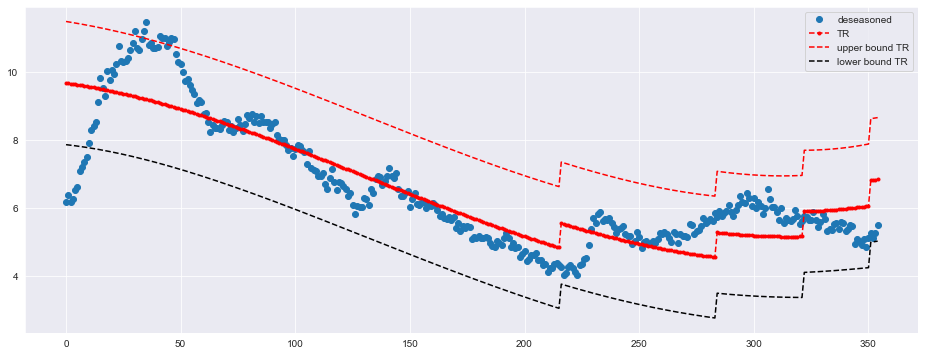

In [195]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(data['t'][:355], data['d'][:355], 'o', label="deseasoned")
ax.plot(data['t'][:355], results1.fittedvalues, 'r--.', label="TR")
ax.plot(data['t'][:355], iv_u, 'r--', label="upper bound TR")
ax.plot(data['t'][:355], iv_l, 'k--', label="lower bound TR")
ax.legend(loc='best');

##### scatter plot of deseasoned datya, line plot TR, and corresponding in-sample PI

KeyError: 'tr_hi_95'

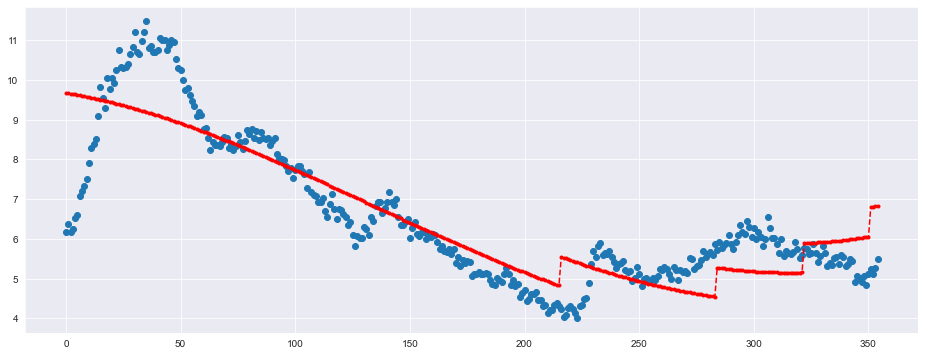

In [196]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(data['t'][:355], data['d'][:355], 'o', label="deseasoned")
ax.plot(data['t'][:355], results1.fittedvalues, 'r--.', label="TR")
ax.plot(data['t'], df['tr_hi_95'], 'r--', label="upper/lower bound TR")
ax.plot(data['t'], df['tr_lo_95'], 'r--')
ax.plot(data['t'], df['trsn_hi_95'], 'g--', label="upper/lower bound TR*SN")
ax.plot(df['t'], df['trsn_lo_95'], 'g--')
ax.legend(loc='best');

In [198]:
### cylce times irregular
data['clir'] = data['d'] / data['tr']
data['clir'].head(10)

Date
1990m1     0.639158
1990m2     0.658532
1990m3     0.638391
1990m4     0.647388
1990m5     0.677637
1990m6     0.686559
1990m7     0.736743
1990m8     0.749526
1990m9     0.764845
1990m10    0.782733
Name: clir, dtype: float64

In [199]:
### Moving average
data['cl']      = data['clir'].rolling(window=3, center=True).mean()
data['cl'][0]   = (2*data['clir'][0]   + data['clir'][1]  )/3
data['cl'][354] = (2*data['clir'][354] + data['clir'][353])/3
data['cl'].head(10)

<ipython-input-199-d5b66f7c2c62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cl'][0]   = (2*data['clir'][0]   + data['clir'][1]  )/3
<ipython-input-199-d5b66f7c2c62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cl'][354] = (2*data['clir'][354] + data['clir'][353])/3


Date
1990m1     0.645616
1990m2     0.645360
1990m3     0.648103
1990m4     0.654472
1990m5     0.670528
1990m6     0.700313
1990m7     0.724276
1990m8     0.750372
1990m9     0.765701
1990m10    0.791099
Name: cl, dtype: float64

In [201]:
### replace NA of CL with 1
data['cl'].iloc[-60:] = 1
data['cl'].tail(10)

C:\Users\Micha\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Date
2018m11                1.0
2018m12                1.0
2019m1                 1.0
2019m2                 1.0
2019m3                 1.0
2019m4                 1.0
2019m5                 1.0
2019m6                 1.0
2019m7                 1.0
2030-02-01 00:00:00    1.0
Name: cl, dtype: float64

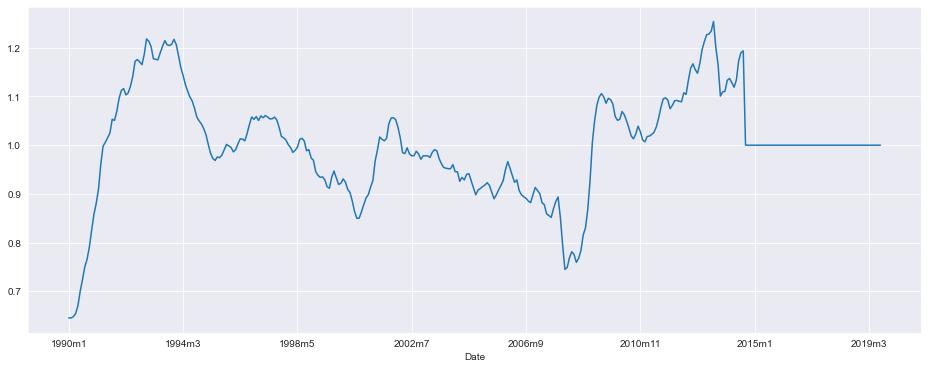

In [202]:
data['cl'].plot()
plt.show()

In [203]:
### compute IR
data['ir'] =data['clir']/data['cl']
data['ir'].tail(10)

Date
2018m11                0.833614
2018m12                0.815597
2019m1                 0.840733
2019m2                 0.800522
2019m3                 0.845462
2019m4                 0.771970
2019m5                 0.751681
2019m6                 0.771430
2019m7                 0.804065
2030-02-01 00:00:00         NaN
Name: ir, dtype: float64

In [204]:
data['trsncl']= data['trsn'] * data['cl']
data['trsncl'].tail(10)

Date
2018m11                5.638101
2018m12                5.885263
2019m1                 6.541913
2019m2                 6.745597
2019m3                 6.387039
2019m4                 6.865554
2019m5                 6.784789
2019m6                 6.611099
2019m7                 6.467142
2030-02-01 00:00:00         NaN
Name: trsncl, dtype: float64

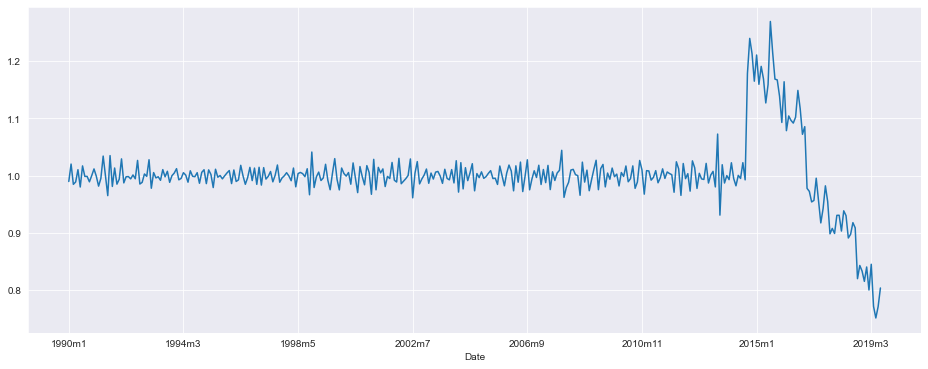

In [205]:
### plot IR
data['ir'].plot()
plt.show()

### Now let's plot everything together (in-sample)

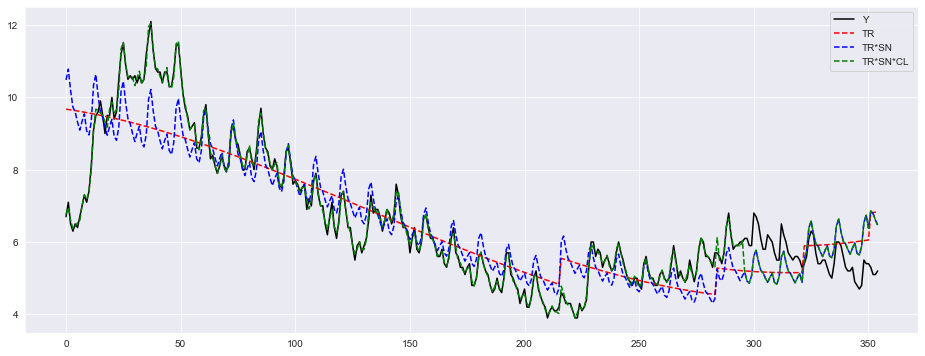

In [207]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(data['t'][:355], data['unemp'][:355]     , 'k'  , label="Y")
ax.plot(data['t'][:355], data['tr'][:355]    , 'r--', label="TR")
ax.plot(data['t'][:355], data['trsn'][:355]  , 'b--', label="TR*SN")
ax.plot(data['t'][:355], data['trsncl'][:355], 'g--', label="TR*SN*CL")
ax.legend(loc='best');

plt.show()

### Now let's plot each component (in-sample)

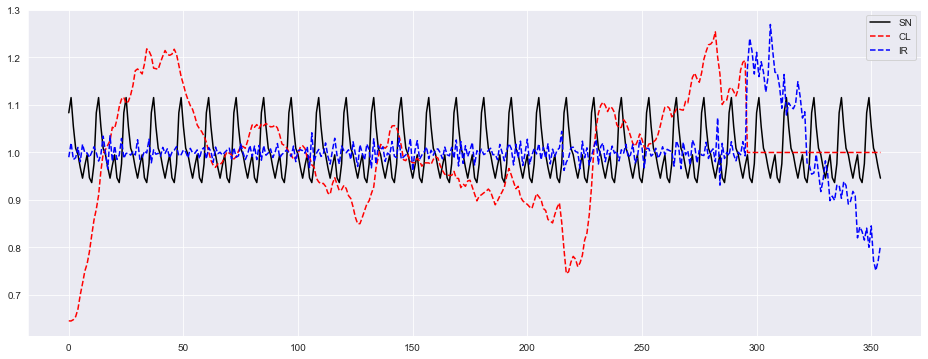

In [208]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(data['t'][:355], data['sn'][:355], 'k'  , label="SN")
ax.plot(data['t'][:355], data['cl'][:355], 'r--', label="CL")
ax.plot(data['t'][:355], data['ir'][:355], 'b--', label="IR")
ax.legend(loc='best');

plt.show()

### prediction plot (in-sample and out-of-sample)

KeyError: 'trsn_hi_95'

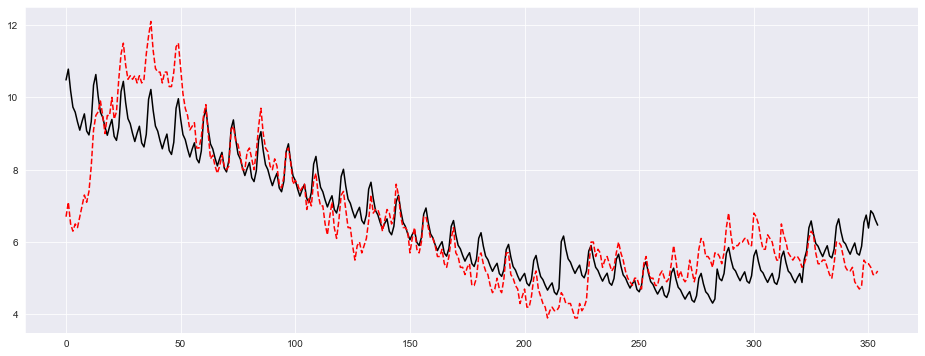

In [210]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(data['t'], data['trsn'], 'k'  , label="TR*SN")
ax.plot(data['t'], data['unemp']   , 'r--', label="Y")

ax.plot(data['t'][-60:], data['trsn_hi_95'][-60:], 'b--', label="upper bound of TR*SN")
ax.plot(data['t'][-60:], data['trsn_lo_95'][-60:], 'g--', label="lower bound of TR*SN")
ax.legend(loc='best');

plt.show()